In [8]:
! ls Datasets/scrapped/All


Fire  NoFire


In [9]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [10]:
DATADIR = 'Datasets/scrapped/All'
CATEGORIES = ['Fire', 'NoFire']

In [11]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [12]:
training_data = create_training_data()


100%|██████████| 1300/1300 [00:28<00:00, 45.85it/s]


In [13]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

2423
1
1
1
1
1
1
1
1
0
0


In [14]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

(64, 64, 3)

In [15]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [20]:
history = model.fit(X, Y, batch_size=32, epochs=100,validation_split=0.3)
# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                     verbose=1)


Train on 1696 samples, validate on 727 samples
Epoch 1/100
1696/1696 [==============================] - 6s 4ms/sample - loss: 0.5822 - acc: 0.7005 - val_loss: 0.5330 - val_acc: 0.7400
Epoch 2/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.5092 - acc: 0.7612 - val_loss: 0.5650 - val_acc: 0.7125
Epoch 3/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.4913 - acc: 0.7659 - val_loss: 0.4808 - val_acc: 0.7978
Epoch 4/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.4501 - acc: 0.7989 - val_loss: 0.4579 - val_acc: 0.7964
Epoch 5/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.4153 - acc: 0.8137 - val_loss: 0.4099 - val_acc: 0.8143
Epoch 6/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.3929 - acc: 0.8202 - val_loss: 0.4180 - val_acc: 0.8047
Epoch 7/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.3739 - acc: 0.8296 - val_loss: 0.3918 - val_acc: 0

1696/1696 [==============================] - 5s 3ms/sample - loss: 0.0580 - acc: 0.9770 - val_loss: 0.4124 - val_acc: 0.9106
Epoch 61/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.0687 - acc: 0.9782 - val_loss: 0.3142 - val_acc: 0.9271
Epoch 62/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.0403 - acc: 0.9847 - val_loss: 0.3190 - val_acc: 0.9202
Epoch 63/100
1696/1696 [==============================] - 6s 3ms/sample - loss: 0.0404 - acc: 0.9841 - val_loss: 0.3325 - val_acc: 0.9285
Epoch 64/100
1696/1696 [==============================] - 6s 3ms/sample - loss: 0.0329 - acc: 0.9876 - val_loss: 0.3929 - val_acc: 0.9188
Epoch 65/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.0231 - acc: 0.9912 - val_loss: 0.4106 - val_acc: 0.9175
Epoch 66/100
1696/1696 [==============================] - 5s 3ms/sample - loss: 0.0335 - acc: 0.9888 - val_loss: 0.3935 - val_acc: 0.9188
Epoch 67/100
1696/1696 [=======================

In [21]:
model.save('TrainedModels/Fire-64x64-color-v7.1-soft.h5')

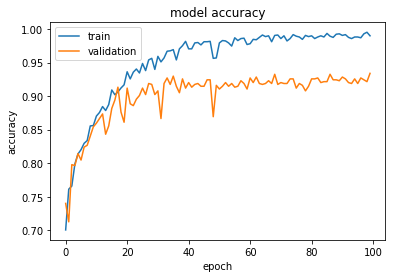

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

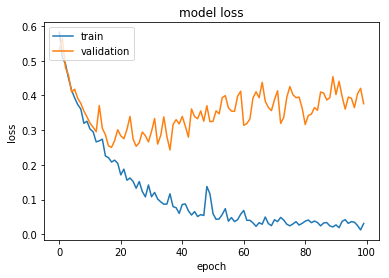

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
model = tf.keras.models.load_model('TrainedModels/Fire-64x64-color-v7-soft.h5')

# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                   verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
# plot_model(model, to_file='model_small.svg', show_layer_names=False, show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
average_pooling2d_3 (Average (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
__________